![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © 2016 Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Exercise - The Titanic Dataset

In this exercise we are going to put in practice what we have learnt in the notebooks of the session. 

Answer directly in your copy of the exercise and submit it as a moodle task.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline

# Reading Data

Assign the variable *df* a Dataframe with the Titanic Dataset from the URL https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"

Print *df*.

In [2]:
url = "https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"
df = pd.read_csv(url)
# Show the first 5 rows
#df[:5]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Munging and Exploratory visualisation

Obtain number of passengers and features of the dataset

In [3]:
df.shape

(891, 12)

El número de entradas del dataset (número de pasajeros) es 891, con 12 atributos cada uno.

Obtain general statistics (count, mean, std, min, max, 25%, 50%, 75%) about the column Age

In [4]:
df[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Obtain the median of the age of the passengers

In [22]:
df['Age'].median()

28.0

Obtain number of missing values per feature

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many passsengers have survived? List them grouped by Sex and Pclass.

Assign the result to a variable df_1 and print it

In [7]:
df_1 = df[df.Survived == 1].groupby(['Sex','Pclass'])['PassengerId'].count()
df_1


Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: PassengerId, dtype: int64

Visualise df_1 as an histogram.

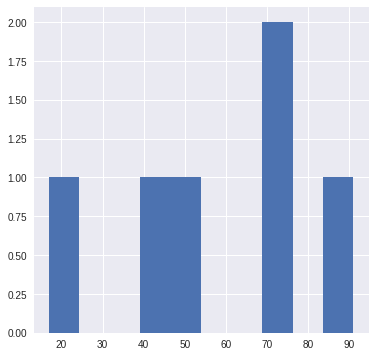

In [8]:
df_1.hist(figsize=(6,6))


# Feature Engineering

Here you can find some features that have been proposed for this dataset. Your task is to analyse them and provide some insights. 

Use pandas and visualisation to justify your conclusions

## Feature FamilySize 

Regarding SbSp and Parch, we can define a new feature, 'FamilySize' that is the combination of both.

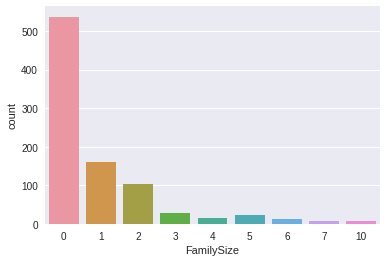

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.countplot('FamilySize', data=df)

## Feature Alone

It seems many people who went alone survived. We can define a new feature 'Alone'

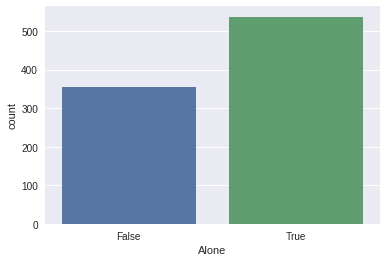

In [10]:
df['Alone'] = (df.FamilySize == 0)
sns.countplot('Alone', data=df)

## Feature Salutation

If we observe well in the name variable, there is a 'title' (Mr., Miss., Mrs.). We can add a feature wit this title.

In [11]:
#Taken from http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

df['Salutation'] = df['Name'].apply(name_extract)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Mr


We can list the different salutations.

In [12]:
df['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [13]:
df.groupby(['Salutation']).size()

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

There only 4 main salutations, so we combine the rest of salutations in 'Others'.

In [14]:
def group_salutation(old_salutation):
    if old_salutation == 'Mr':
        return('Mr')
    else:
        if old_salutation == 'Mrs':
            return('Mrs')
        else:
            if old_salutation == 'Master':
                return('Master')
            else: 
                if old_salutation == 'Miss':
                    return('Miss')
                else:
                    return('Others')
df['Salutation'] = df['Salutation'].apply(group_salutation)
df.groupby(['Salutation']).size()

Salutation
Master     40
Miss      182
Mr        517
Mrs       125
Others     27
dtype: int64

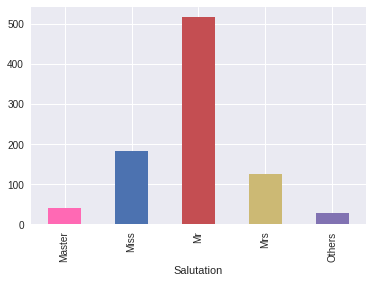

In [15]:
# Distribution
colors_sex = ['#ff69b4', 'b', 'r', 'y', 'm', 'c']
df.groupby('Salutation').size().plot(kind='bar', color=colors_sex)

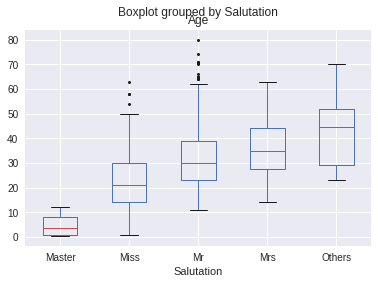

In [16]:
df.boxplot(column='Age', by = 'Salutation', sym='k.')

## Features Children and Female

In [17]:
# Specific features for Children and Female since there are more survivors
df['Children']   = df['Age'].map(lambda x: 1 if x < 6.0 else 0)
df['Female']     = df['Sex'].map(lambda x: 1 if x == "female" else 0)

## Feature AgeGroup

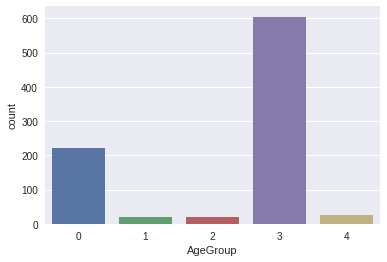

In [18]:
# Group ages to simplify machine learning algorithms.  0: 0-5, 1: 6-10, 2: 11-15, 3: 16-59 and 4: 60-80
df['AgeGroup'] = 0
df.loc[(df.Age<6),'AgeGroup'] = 0
df.loc[(df.Age>=6) & (df.Age < 11),'AgeGroup'] = 1
df.loc[(df.Age>=11) & (df.Age < 16),'AgeGroup'] = 2
df.loc[(df.Age>=16) & (df.Age < 60),'AgeGroup'] = 3
df.loc[(df.Age>=60),'AgeGroup'] = 4
sns.countplot('AgeGroup', data=df)

## Feature Deck
Only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck.

In [51]:
def substrings_in_string(big_string, substrings):
    if type(big_string) == float:
        if np.isnan(big_string):
            return 'X'
    for substring in substrings:
        if big_string.find(substring) == 0:
            return substring
    print(big_string)
    return 'X'
 
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df[['Deck','Cabin']][10:30]

,Deck,Cabin
10,G,G6
11,C,C103
12,X,NaN
13,X,NaN
14,X,NaN
15,X,NaN
16,X,NaN
17,X,NaN
18,X,NaN
19,X,NaN


## Feature FarePerPerson

This feature is created from two previous features: Fare and FamilySize.

In [20]:
df['FarePerPerson']= df['Fare'] / (df['FamilySize'] + 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Salutation,Children,Female,AgeGroup,Deck,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Mr,0,0,3,X,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Mrs,0,1,3,A,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Miss,0,1,3,X,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,Mrs,0,1,3,A,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Mr,0,0,3,X,8.05000


## Feature AgeClass

Since age and class are both numbers we can just multiply them and get a new feature.


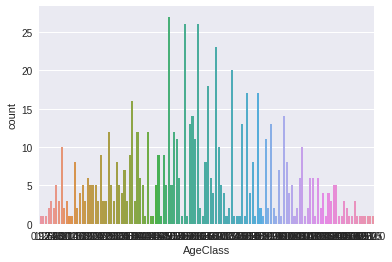

In [21]:
df['AgeClass']=df['Age']*df['Pclass']
sns.countplot('AgeClass', data=df)

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© 2016 Carlos A. Iglesias, Universidad Politécnica de Madrid.